<a href="https://colab.research.google.com/github/smaranjitghose/Awesome_GenAI_Experiments/blob/main/Moondream_Tutorial_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Moondream
!pip -q install moondream

In [ ]:
# Import Dependencies
import moondream as md
from PIL import Image

Fetch API Key from [here](https://console.moondream.ai/dashboard/api-keys)

In [ ]:
# Store API Key in Scretes and Load it in a variable
from google.colab import userdata
moondream_api = userdata.get('MOONDREAM_API')

In [ ]:
# Initialize with API key
model = md.vl(api_key=moondream_api)

In [ ]:
meetnig_img_encoded = model.encode_image(meeting_img)

# Image Captioning

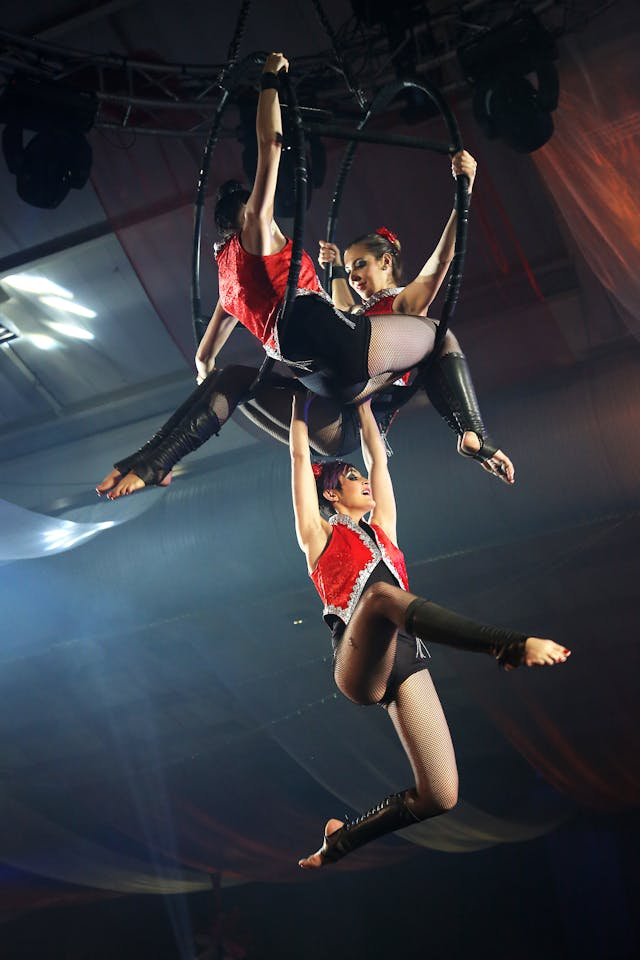

In [ ]:
img = Image.open("/content/circus.jpg")
encoded_image = model.encode_image(img)
img

In [ ]:
caption = model.caption(encoded_image)["caption"]
print(caption)

 The image captures a vibrant circus performance, featuring two acrobats suspended in mid-air, performing a daring aerial stunt. The acrobats are wearing red and black outfits, with black leggings and black boots. They are also wearing black tights or stockings. The acrobats are holding onto the black rings of a large, circular aerial hoop. The background is a dark, possibly black, stage with a red curtain, creating a dramatic backdrop for the acrobatic display. The acrobats' hair is styled in a bun or ponytail.


## Visual Querying

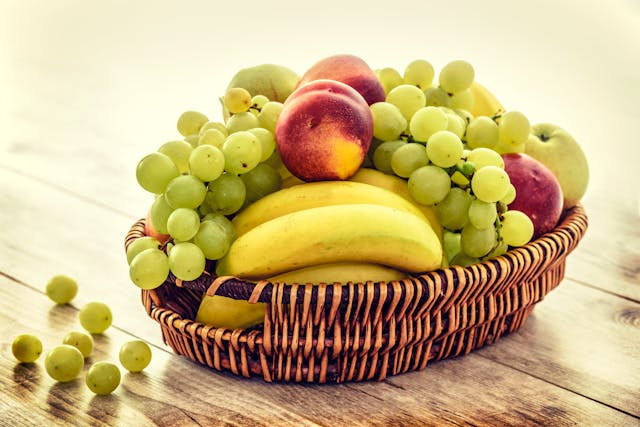

In [ ]:
img = Image.open("/content/fruits.jpg")
encoded_image = model.encode_image(img)
img

In [ ]:
answer = model.query(encoded_image, "What are the different types of fruits present here? Do you see a monkey?")["answer"]
print(answer)

 The image shows various types of fruits, including bananas, grapes, apples, and peaches. There is no monkey present in the image.


## Object Detection


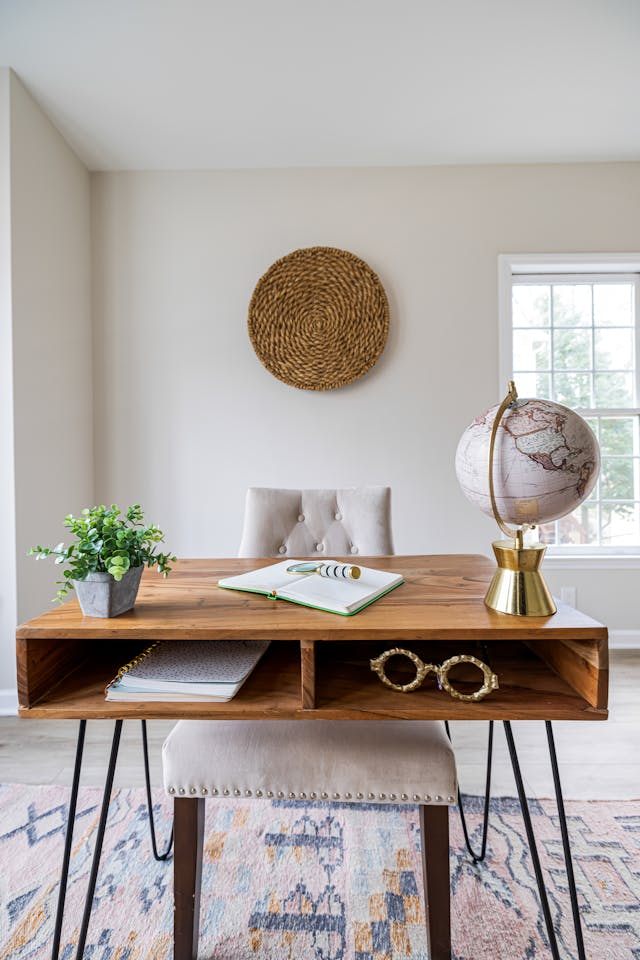

In [ ]:
img = Image.open("/content/study_desk.jpg")
encoded_image = model.encode_image(img)
img

In [ ]:
from PIL import Image, ImageDraw

def plot_objects_on_image(image, bounding_boxes, box_color="red", box_width=2):
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    # Get the image dimensions
    width, height = image.size
    # Draw bounding boxes for each detected object
    for bbox in bounding_boxes:
        # Convert normalized coordinates to pixel coordinates
        x_min = int(bbox['x_min'] * width)
        y_min = int(bbox['y_min'] * height)
        x_max = int(bbox['x_max'] * width)
        y_max = int(bbox['y_max'] * height)
        # Draw the rectangle
        draw.rectangle([x_min, y_min, x_max, y_max], outline=box_color, width=box_width)
    return image

[{'x_min': 0.712890625, 'y_min': 0.40478515625, 'x_max': 0.94921875, 'y_max': 0.60888671875}]


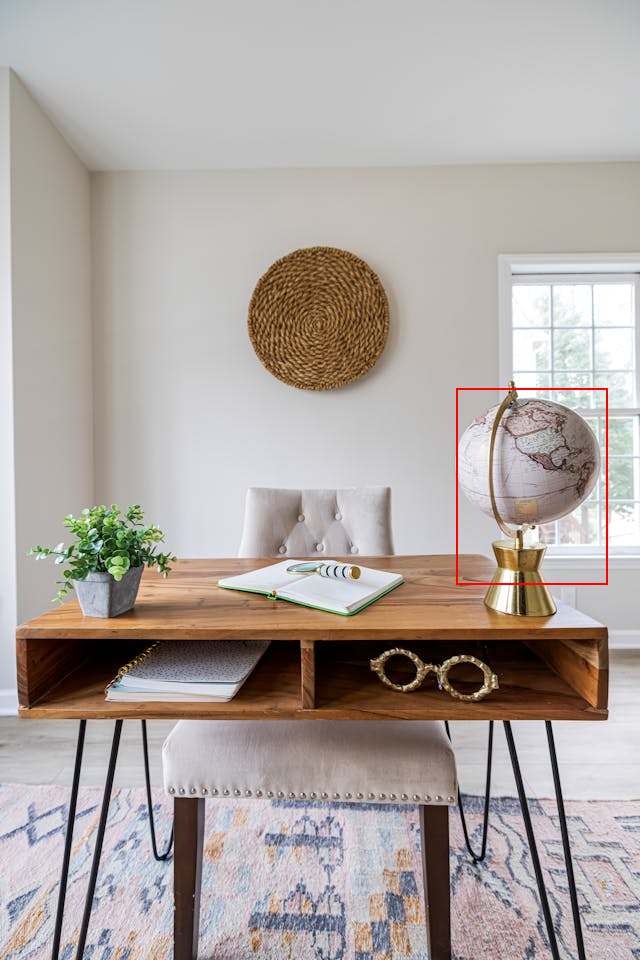

In [ ]:
detect_result = model.detect(img, 'globe')
print(detect_result['objects'])
output_img = plot_objects_on_image(img, detect_result['objects'])
output_img

## Pointing

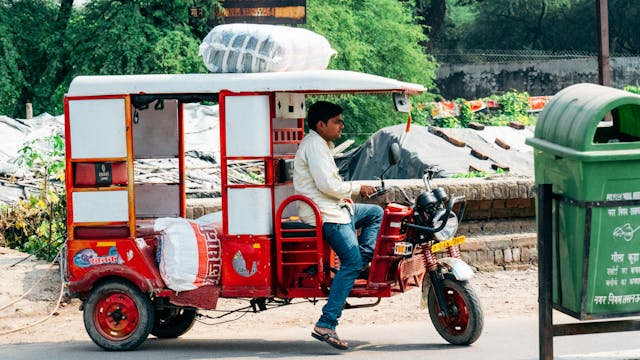

In [ ]:
img = Image.open("/content/auto_driver.jpg")
img

In [ ]:
from PIL import Image, ImageDraw

def plot_point_on_image(image, points, point_color="red", point_radius=5):
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    # Get the image dimensions
    width, height = image.size
    # Plot each point
    for point in points:
        # Convert normalized coordinates to pixel coordinates
        x = int(point['x'] * width)
        y = int(point['y'] * height)
        # Define the bounding box for the point (circle)
        bounding_box = [
            (x - point_radius, y - point_radius),
            (x + point_radius, y + point_radius)
        ]
        # Draw the point (circle)
        draw.ellipse(bounding_box, fill=point_color)
    return image

[{'x': 0.5087890625, 'y': 0.4716796875}]


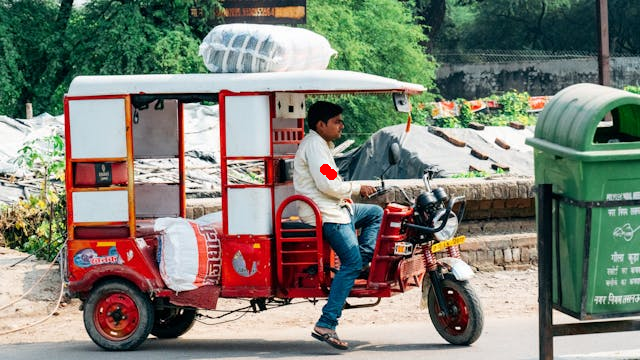

In [ ]:
# Point at an object
point_result = model.point(img, 'Driver')
print(point_result["points"])
output_img = plot_point_on_image(img, point_result["points"])
output_img

## OCR with Structured Outputs

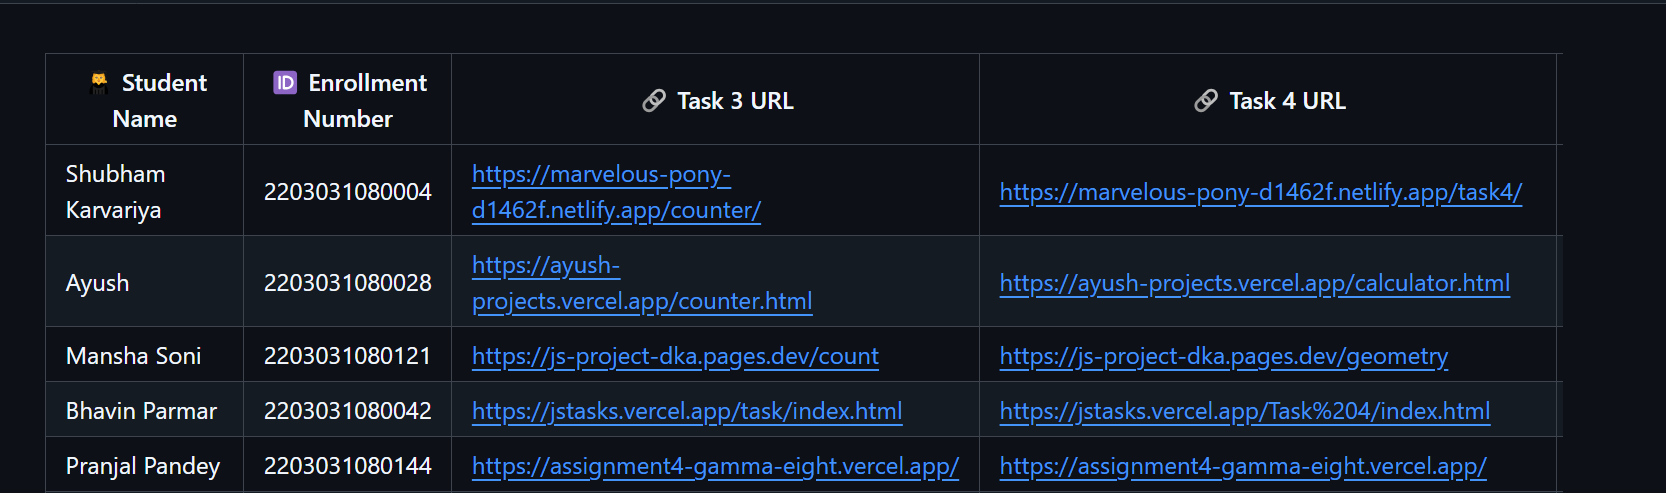

In [ ]:
img = Image.open("/content/ocr_to_json.png")
encoded_image = model.encode_image(img)
img

In [ ]:
answer = model.query(encoded_image, "Give me the Ayush row in JSON")["answer"]
print(answer)

 [
  {
    "name": "Ayush",
    "number": "22305180838",
    "url": "https://ajush-projects.veral.app.counter.html"
  }
]


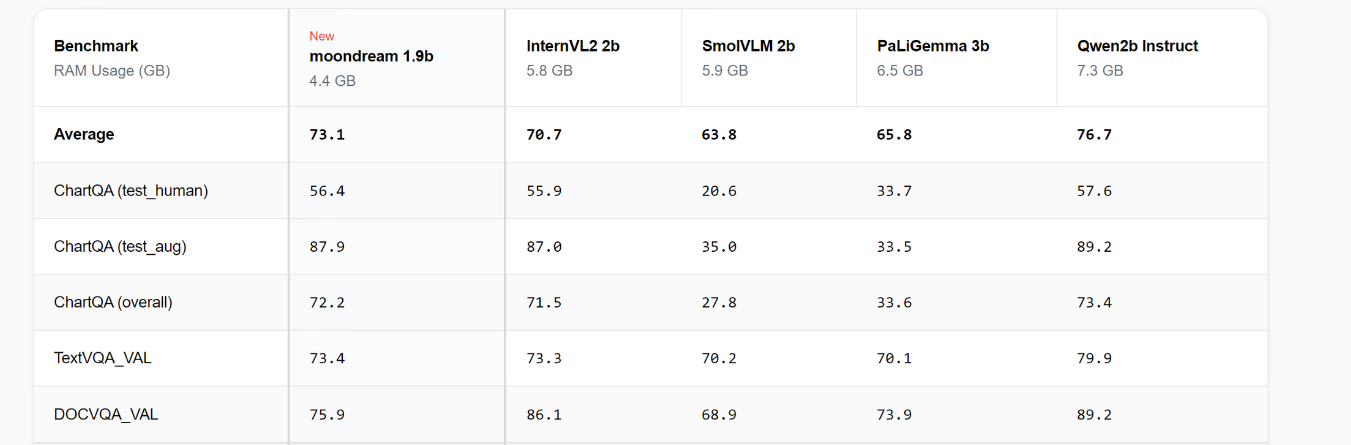

In [ ]:
img = Image.open("/content/benchmark.png")
encoded_image = model.encode_image(img)
img

In [ ]:
answer = model.query(encoded_image, "Avarage, moondream 1.9b, SmolVLM 2b, in markdown")["answer"]
print(answer)

 | Benchmark | Avg | Moondream 1.9b | SmolVLM 2b |
|---|---|---|---| 
| Average | 73.1 | 79.7 | 64.8 |


## Text Detection in Wild

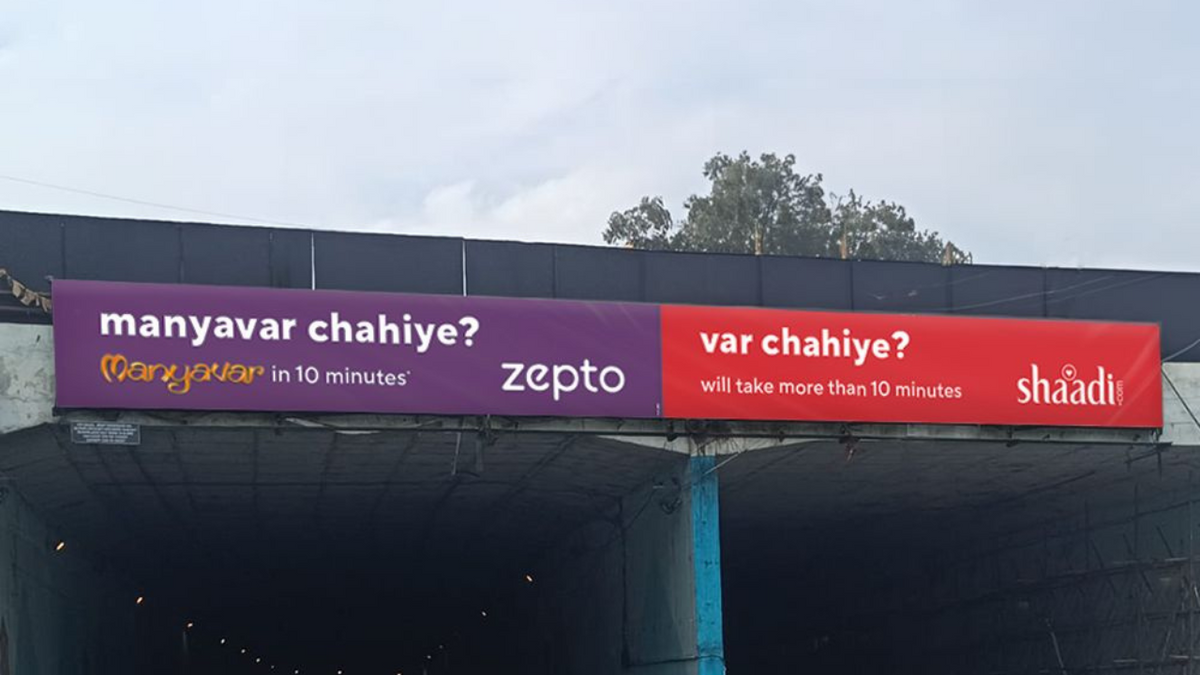

In [ ]:
img = Image.open("/content/billboard_ad.png")
encoded_image = model.encode_image(img)
img

In [ ]:
answer = model.query(encoded_image, "What are the two slogans on the billboard, in JSON")["answer"]
print(answer)

 {
  "left": "manyavar chahiye?",
  "right": "var chahiye?"
}


## Chart OCR

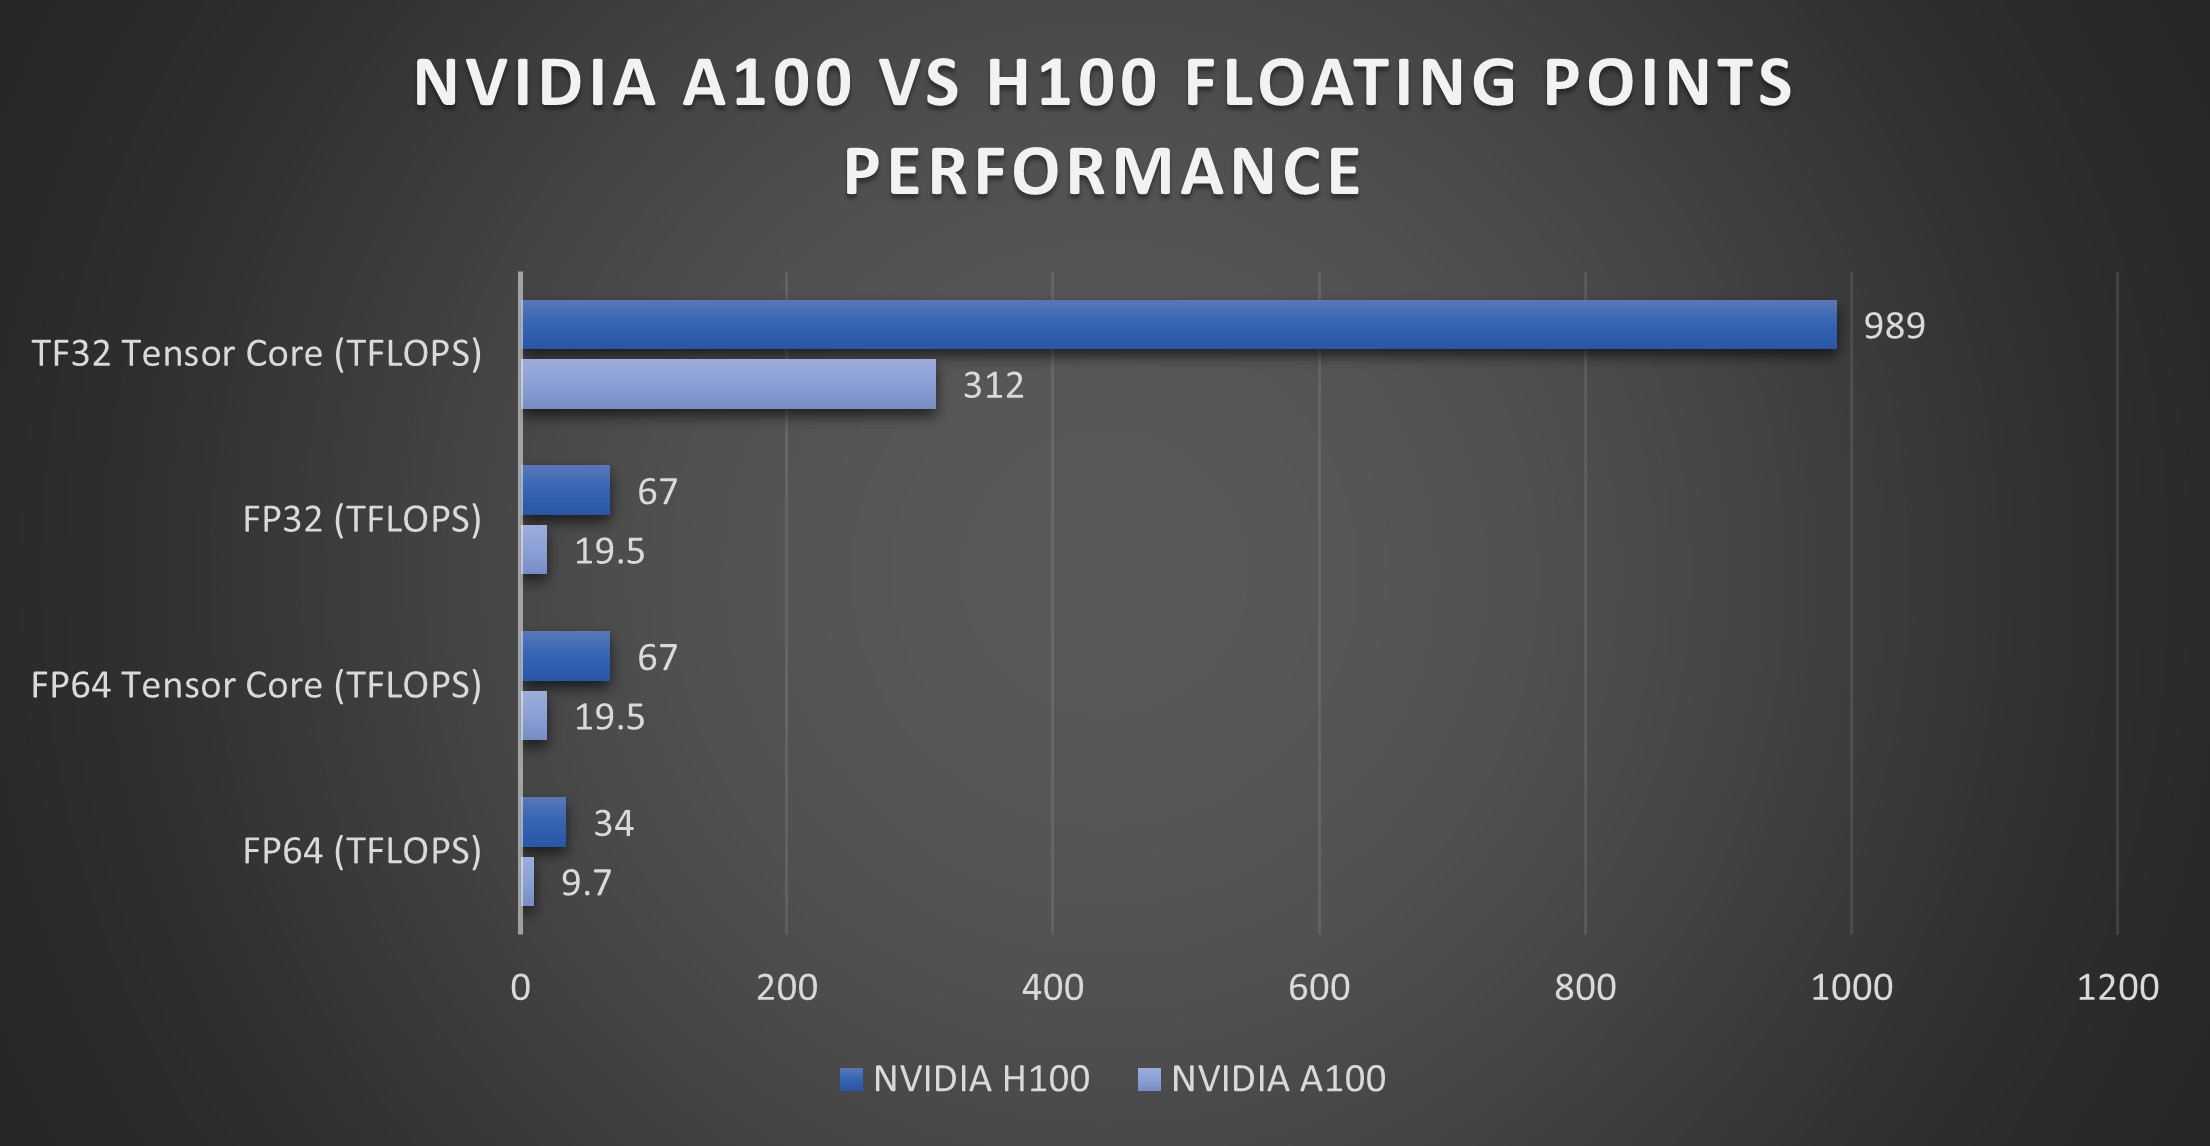

In [ ]:
img = Image.open("/content/comparision_bar_chart_vertical.jpg")
encoded_image = model.encode_image(img)
img

In [ ]:
answer = model.query(encoded_image, "NVIDIA H100's FP32 (TFLOPS) and FP64 (TFLOPS) ?")["answer"]
print(answer)

 FP32: 67, FP64: 34
